# **Debugging**

**Raising Exceptions**:
Python raises an exception whenever it tries to execute invalid code. 

We already seen, how to handle Python’s exceptions with **try** and **except** statements so that the program can recover from exceptions that were anticipated. 

But, own exceptions in the code  can also be raised.

Raising an exception is a way of saying, “Stop running the code in this function
and move the program execution to the except statement.”

Exceptions are raised with a **raise** statement. 

In code, a raise statement consists of the following:

  • The raise keyword

  • A call to the Exception() function

  • A string with a helpful error message passed to the Exception() function 
  
  For example, enter the following into the interactive shell:

In [1]:
raise Exception('This is the error message.')

Exception: ignored

# **Explanation**: 

If there are **no try** and **except statements** covering the raise statement that raised the exception, the program simply crashes and displays the exception’s error message.

Often it’s the code that calls the function, not the fuction itself, that knows how to handle an expection. 

So a raise statement has to be placed **inside a function** and the **try** and **except** statements, which can commonly be seen  in the code calling the function. 

For example, open a new file editor window, enter the following code, and save the program as boxPrint.py:

In [2]:
def boxPrint(symbol, width, height):
  if len(symbol) != 1:
    raise Exception('Symbol must be a single character string.') #1
  if width <= 2:
    raise Exception('Width must be greater than 2.')             #2
  if height <= 2:
    raise Exception('Height must be greater than 2.')            #3
  print(symbol * width)
  for i in range(height - 2):
    print(symbol + (' ' * (width - 2)) + symbol)
  print(symbol * width)
  
for sym, w, h in (('*', 4, 4), ('O', 20, 5), ('x', 1, 3), ('ZZ', 5, 5)):
    try:
      boxPrint(sym, w, h)
    except Exception as err:                                     #4
      print('An exception happened: ' + str(err))                #5


****
*  *
*  *
****
OOOOOOOOOOOOOOOOOOOO
O                  O
O                  O
O                  O
OOOOOOOOOOOOOOOOOOOO
An exception happened: Width must be greater than 2.
An exception happened: Symbol must be a single character string.


**Explanation**:

Here a **boxPrint()** function has been defined  that takes a character, a width, and a height, and uses the character to make a little picture of a box with that width and height. 

This box shape is printed to the console.

Suppose there is a requirement that the character to be a single character, and the width and height to be greater than 2. 

So, if statements to raise exceptions is added,  if these requirements aren’t  satisfied. 

Later, when **boxPrint()** with various arguments is called , then the **try/except** will handle invalid arguments.

This program uses the except Exception as **err** form of the except statement #4.

If an Exception object is returned from boxPrint() #1 #2 #3, this except statement will store it in a variable named **err**. 

The Exception object can then be converted to a string by passing it to **str()** to produce a userfriendly error message #5. 

When this boxPrint.py is executed, the output will look like this:

****

* *

* *

****

OOOOOOOOOOOOOOOOOOOO

O O

O O

O O

OOOOOOOOOOOOOOOOOOOO

An exception happened: Width must be greater than 2.

An exception happened: Symbol must be a single character string.

# **Getting the Traceback as a String**
When Python encounters an error, it produces a treasure trove of error
information called the traceback. 

The traceback includes the error message, the line number of the line that caused the error, and the sequence of the function calls that led to the error.

This sequence of calls is called the call stack.

Open a new file editor window in IDLE, enter the following program, and save it as errorExample.py:

In [ ]:
def spam():
  bacon()
 
def bacon():
  raise Exception('This is the error message.')
  
spam()

When the code is run errorExample.py, the output will look like this:

Traceback (most recent call last):

File "errorExample.py", line 7, in <module> 
  spam()

File "errorExample.py", line 2, in spam 
  bacon()

File "errorExample.py", line 5, in bacon

  raise Exception('This is the error message.')

Exception: This is the error message.

# **Explanation**:

From the traceback, it can be seen that the error happened on line 5, in the bacon() function. 

This particular call to bacon() came from line 2, in the spam() function, which in turn was called on line 7. 

In programs where functions can be called from multiple places, the call stack can help you determine which call led to the error.

The traceback is displayed by Python whenever a raised exception goes unhandled. 

But it can also obtain this as a string by calling **traceback.format_exc()**. 

This function is useful if it is needed that the information from an exception’s traceback, also it is required that an **except** statement to gracefully handle the exception.

The program will need to import Python’s traceback module before calling this function.

For example, instead of crashing the program right when an exception occurs, it can write the traceback information to a log file and keep the program running. 

the log file later  can be looked at a later stage, when you’re ready to debug the program. 

Enter the following into the interactive shell:

In [ ]:
import traceback

try:
  raise Exception('This is the error message.')
except:
  errorFile = open('errorInfo.txt', 'w')
  errorFile.write(traceback.format_exc())
  errorFile.close()
  print('The traceback info was written to errorInfo.txt.')

# **Assertions**
An assertion is a sanity check to make sure the code isn’t doing something obviously wrong. 

These sanity checks are performed by **assert** statements. 

If the sanity check fails, then an **AssertionError exception** is raised. 

In code, an assert statement consists of the following:

    • The assert keyword
    • A condition (that is, an expression that evaluates to True or False)
    • A comma
    • A string to display when the condition is False

For example, enter the following into the interactive shell:

In [7]:
podBayDoorStatus = "open"
assert podBayDoorStatus == 'open', 'The pod bay doors need to be "open".'
podBayDoorStatus = "closed"
if(podBayDoorStatus == 'open'):
  print('\nThe value of podBayDoorStatus = open')

# **Explanation**:

Here we’ve set podBayDoorStatus to 'open', so from now on, we fully expect the value of this variable to be 'open'. 

In a program that uses this variable, we might have written a lot of code under the assumption that the value is 'open'—code that depends on its being 'open' in order to work as we expect. 

So we add an assertion to make sure we’re right to assume podBayDoorStatus
is 'open'. 

Here, we include the message 'The pod bay doors need to be "open".' so it’ll be easy to see what’s wrong if the assertion fails.

Later, say we make the obvious mistake of assigning podBayDoorStatus another value, but don’t notice it among many lines of code. 

The assertion catches this mistake and clearly tells us what’s wrong.

In plain English, an assert statement says, “I assert that this condition
holds true, and if not, there is a bug somewhere in the program.” 

Unlike exceptions, your code should not handle assert statements with try and
except; if an assert fails, your program should crash. 

By failing fast like this, you shorten the time between the original cause of the bug and when you first notice the bug. 

This will reduce the amount of code you will have to check before finding the code that’s causing the bug.

Assertions are for programmer errors, not user errors. 

For errors that can be recovered from (such as a file not being found or the user entering invalid data), raise an exception instead of detecting it with an assert statement.

# **Using an Assertion in a Traffic Light Simulation**

Suppose a traffic light simulation program is being built . 

The data structure representing the stoplights at an intersection is a dictionary with keys 'ns' and 'ew', for the stoplights facing north-south and east-west, respectively. 

The values at these keys will be one of the strings 'green', 'yellow', or 'red'. 

The code would look something like this:

In [ ]:
market_2nd = {'ns': 'green', 'ew': 'red'}
mission_16th = {'ns': 'red', 'ew': 'green'}

These two variables will be for the intersections of Market and
2nd Street, and Mission and 16th Street. 

To start the project, a **switchLights()** function has to be written , which will take an intersection dictionary as an argument and switch the lights.

At first, you might think that switchLights() should simply switch each light to the next color in the sequence:

Any 'green' values should change to 'yellow', 'yellow' values should change to 'red', and 'red' values should change to 'green'. 

The code to implement this idea might look like this:

In [ ]:
def switchLights(stoplight):
  for key in stoplight.keys():
    if stoplight[key] == 'green':
        stoplight[key] = 'yellow'
    elif stoplight[key] == 'yellow':
        stoplight[key] = 'red'
    elif stoplight[key] == 'red':
        stoplight[key] = 'green'
switchLights(mission_16)


North to South Traffic is ON, East to West Traffic is Red


You may already see the problem with this code, but let’s pretend you  wrote the rest of the simulation code, thousands of lines long, without noticing it.

When you finally do run the simulation, the program doesn’t crash—but your virtual cars do! 

Since you’ve already written the rest of the program, you have no idea where the bug could be. Maybe it’s in the code simulating the cars or in the code simulating the virtual drivers. 

It could take hours to trace the bug back to the **switchLights()** function.

But if while writing **switchLights()** you had added an assertion to check that at least one of the lights is always red, you might have included the following at the bottom of the function:

In [ ]:
assert 'red' in stoplight.values(), 'Neither light is red! ' + str(stoplight)


With this assertion in place, your program would crash with this error message:

Traceback (most recent call last):

  File "carSim.py", line 14, in <module>

      switchLights(market_2nd)

  File "carSim.py", line 13, in switchLights
    assert 'red' in stoplight.values(), 'Neither light is red! '+ str(stoplight)

u AssertionError: Neither light is red! {'ns': 'yellow', 'ew': 'green'}

# **Explanation**:

The important line here is the AssertionError **u**. 

While your program crashing is not ideal, it immediately points out that a sanity check failed:

Neither direction of traffic has a red light, meaning that traffic could be going both ways. 

By failing fast early in the program’s execution, you can save yourself a lot of future debugging effort.

# **Disabling Assertions**
Assertions can be disabled by passing the -O option when running Python.

This is good when writing and testing of the program has finished  and we don’t want it to be slowed down by performing sanity checks (although most of the time assert statements do not cause a noticeable speed difference).

Assertions are for development, not the final product. 

By the time you hand off the program to someone else to run, it should be free of bugs and not require the sanity checks. 

**Note**: See Appendix B for details about how to launch the probably not insane programs with the -O option.

# **Logging**
If a print() statement is put  in the code to output some variable’s value while the program is running, using a form of logging to debug the code. 

Logging is a great way to understand what’s happening in the program and in what order its happening. 

Python’s logging module makes it easy to create a record of custom messages that is written. 

These log messages will describe when the program execution has reached the logging function call and list any variables that have been specified at that point in time.

On the other hand, a missing log message indicates a part of the code was
skipped and never executed.

**Using the logging Module**

To enable the logging module to display log messages on the screen as the program runs, copy the following to the top of the program (but under the #! python shebang line): 

In [ ]:
import logging
logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s - %(levelname)s - %(message)s')

The logging module’s **basicConfig()** function allows to specify what details about the LogRecord object is to be seen and how those details are to be displayed.

**Example:**

Suppose a function to calculate the factorial of a number is to be written. 

In mathematics, factorial 4 is 1 × 2 × 3 × 4, or 24. 

Factorial 7 is 1 × 2 × 3 × 4 × 5 × 6 × 7, or 5,040. 

Open a new file editor window and enter the following code. 

It has a bug in it, but several log messages are entered  to help the programmer to figure out what is going wrong. 

Save the program as **factorialLog.py**.

In [8]:
import logging
logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s - %(levelname)s - %(message)s')

logging.debug('Start of program')

def factorial(n):
  logging.debug('Start of factorial(%s%%)' % (n))
  total = 1
  for i in range(n + 1):
    total *= i
    logging.debug('i is ' + str(i) + ', total is ' + str(total))
  logging.debug('End of factorial(%s%%)' % (n))
  return total

print(factorial(5))

logging.debug('End of program')

 2020-11-30 08:52:29,180 - DEBUG - Start of program
 2020-11-30 08:52:29,184 - DEBUG - Start of factorial(5%)
 2020-11-30 08:52:29,186 - DEBUG - i is 0, total is 0
 2020-11-30 08:52:29,187 - DEBUG - i is 1, total is 0
 2020-11-30 08:52:29,188 - DEBUG - i is 2, total is 0
 2020-11-30 08:52:29,189 - DEBUG - i is 3, total is 0
 2020-11-30 08:52:29,191 - DEBUG - i is 4, total is 0
 2020-11-30 08:52:29,191 - DEBUG - i is 5, total is 0
 2020-11-30 08:52:29,192 - DEBUG - End of factorial(5%)
 2020-11-30 08:52:29,193 - DEBUG - End of program


0


Here,  the **logging.debug()** function is used when the log information is to be printed. 

This **debug()** function will call **basicConfig()**, and a line of information will be printed. 

This information will be in the specified format of **basicConfig()** and will include the messages that is passed to **debug()**. 

The print(factorial(5)) call is part of the original program, so the result is displayed even if logging messages are disabled.

The output of this program looks like this:

2020-11-23 13:21:21,874 - DEBUG - Start of program

 2020-11-23 13:21:21,876 - DEBUG - Start of factorial(5%)

 2020-11-23 13:21:21,878 - DEBUG - i is 0, total is 0

 2020-11-23 13:21:21,879 - DEBUG - i is 1, total is 0

 2020-11-23 13:21:21,881 - DEBUG - i is 2, total is 0

 2020-11-23 13:21:21,881 - DEBUG - i is 3, total is 0

 2020-11-23 13:21:21,882 - DEBUG - i is 4, total is 0

 2020-11-23 13:21:21,884 - DEBUG - i is 5, total is 0

 2020-11-23 13:21:21,884 - DEBUG - End of factorial(5%)
 
 2020-11-23 13:21:21,886 - DEBUG - End of program 0

Where things went wrong:

The factorial() function is returning 0 as the **factorial of 5**, which isn’t
right. 

The for loop should be multiplying the value in total by the numbers from 1 to 5. 

But the log messages displayed by **logging.debug()** show that **the i variable is starting at 0 instead of 1**. 

Since zero times anything is zero, the rest of the iterations also have the wrong value for total. 

Logging messages provide a trail of problems that can help to figure out when things started going wrong.

Change the **for i in range(n + 1):** line to **for i in range(1, n + 1):**, and
run the program again. 

The output will look like this:

In [ ]:
import logging
logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s - %(levelname)s - %(message)s')

logging.debug('Start of program')

def factorial(n):
  logging.debug('Start of factorial(%s%%)' % (n))
  total = 1
  for i in range(1, n + 1):
    total *= i
    logging.debug('i is ' + str(i) + ', total is ' + str(total))
  logging.debug('End of factorial(%s%%)' % (n))
  return total

print(factorial(5))

logging.debug('End of the program')

# The output of the Program will look as follows:

 2020-11-23 13:28:29,974 - DEBUG - Start of program
 2020-11-23 13:28:29,975 - DEBUG - Start of factorial(5%)
 2020-11-23 13:28:29,976 - DEBUG - i is 1, total is 1
 2020-11-23 13:28:29,977 - DEBUG - i is 2, total is 2
 2020-11-23 13:28:29,978 - DEBUG - i is 3, total is 6
 2020-11-23 13:28:29,979 - DEBUG - i is 4, total is 24
 2020-11-23 13:28:29,980 - DEBUG - i is 5, total is 120
 2020-11-23 13:28:29,985 - DEBUG - End of factorial(5%)
 2020-11-23 13:28:29,997 - DEBUG - End of the program


120


**Comment:**

The **factorial(5)** call correctly returns **120**. 

The log messages showed what was going on inside the loop, which led straight to the bug.

It can be seen that the logging.debug() calls printed out not just the strings passed to them but also a timestamp and the word DEBUG.

# **Don’t Debug with print()**
Typing import logging and logging.basicConfig(level=logging.DEBUG, format=
'%(asctime)s - %(levelname)s - %(message)s') is somewhat unwieldy. 

The programmer may want to use print() calls instead, but it is suggested not to give in to this temptation! 

Once debugging is completed, the coder may end up spending a lot of time removing print() calls from the code for each log message. 

The coder might accidentally remove some print() calls that were being used for **nonlog** messages.

The nice thing about log messages is that the coder is free to fill the program with as many as he likes, and coder can always disable them later by adding
a single logging.disable(logging.CRITICAL) call. 

Unlike print(), the logging module makes it easy to switch between showing and hiding log messages.

Log messages are intended for the programmer, not for the user. 

The user won’t care about the contents of some dictionary value that is needed to see to help with debugging; use a log message for something like that. 

For messages that the user would want to see, like File not found or Invalid input, please enter a number, in such cases a print() call should be used. 

This is to ensure that the user of useful information is not deprived after the log messages are disabled.

# **Logging Levels**
Logging levels provide a way to categorize the log messages by importance.

There are five logging levels, described in Table 10-1 from least to most
important. 

Messages can be logged at each level using a different logging function.

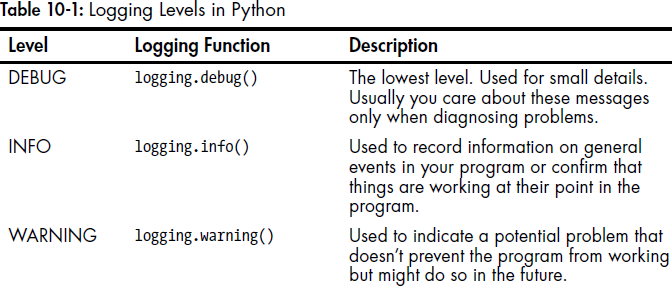

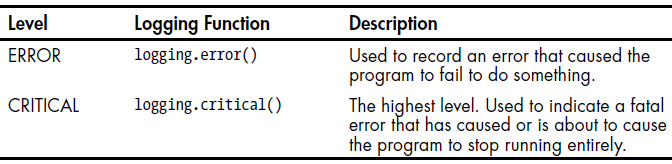

The logging message is passed as a string to these functions. 

The logging levels are suggestions. 

Ultimately, it is up to the user to decide which category the log message falls into. 

Enter the following into the interactive shell:

In [ ]:
import logging
logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s - %(levelname)s - %(message)s')
logging.debug('Some debugging details.')

In [ ]:
logging.info('The logging module is working.')

In [ ]:
logging.warning('An error message is about to be logged.')

In [ ]:
logging.error('An error has occurred.')

In [ ]:
logging.critical('The program is unable to recover!')

# **Explanation:**

The benefit of logging levels is that user can change what priority of logging message he wants to see. 

Passing **logging.DEBUG** to the **basicConfig()** function’s level keyword argument will show messages from all the logging levels (DEBUG being the lowest level).

But after developing the program some more, user may be interested only in errors. 

In that case, user can set **basicConfig()**’s level argument to **logging.ERROR**. 

This will show only **ERROR** and **CRITICAL** messages and skip the **DEBUG**, **INFO**, and **WARNING** messages.

# **Disabling Logging**
After the user has debugged the program, he probably does not want all these log messages to clutter the screen. 

The **logging.disable()** function disables these so that the user don’t have to go into the program and remove all the logging calls by hand. 

The user simply passes **logging.disable()** a logging level, and it will suppress all log messages at that level or lower. 

So if user wants to disable logging entirely, he just adds **logging.disable(logging.CRITICAL)** to the program.

For example, enter the following into the interactive shell:

In [17]:
import logging
logging.basicConfig(level=logging.INFO, format=' %(asctime)s - %(levelname)s - %(message)s')
logging.critical('Critical error! Critical error!')

In [18]:
logging.disable(logging.CRITICAL)
logging.critical('Critical error! Critical error!')
logging.error('Error! Error!')

# **Explanation**:

Since **logging.disable()** will disable all messages after it, the user will probably want to add it near the import logging line of code in the program. 

This way, user can easily find it to comment out or uncomment that call to enable or disable logging messages as needed.

# **Logging to a File**
Instead of displaying the log messages to the screen, user can write them to
a text file. 

The logging.basicConfig() function takes a filename keyword argument, like so:

In [ ]:
import logging
logging.basicConfig(filename='myProgramLog.txt', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

**Explanation**:

The log messages will be saved to **myProgramLog.txt**. 

While logging messages are helpful, they can clutter the screen and make it hard to read the program’s output. 

Writing the logging messages to a file will keep the screen clear and store the messages so user can read them after running the program. 

The user can open this text file in any text editor, such as Notepad or TextEdit.

# **IDLE ’s Debugger**
The debugger is a feature of IDLE that allows the user to execute the program
one line at a time. 

The debugger will run a single line of code and then wait for the user to tell it to continue. 

By running the program “under the debugger” like this, user can take as much time as he wants to examine the values in the variables at any given point during the program’s lifetime. 

This is a valuable tool for tracking down bugs.

**To enable IDLE’s debugger**, click Debug4Debugger in the interactive shell window. 

This will bring up the Debug Control window, which looks like Figure 10-1.

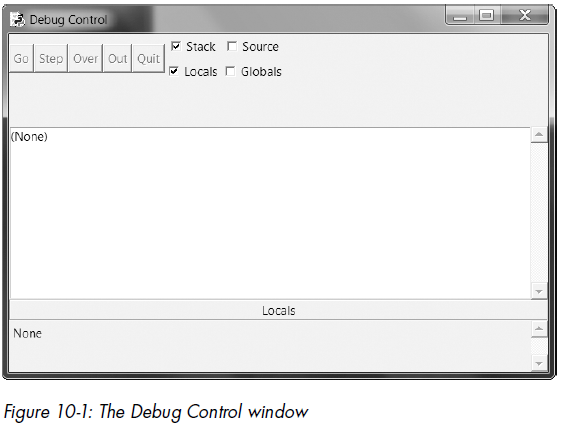

When the Debug Control window appears, select all four of the Stack, Locals, Source, and Globals checkboxes so that the window shows the full set of debug information. 

While the Debug Control window is displayed, any time the user runs a program from the file editor, the debugger will pause execution before the first instruction and display the following:

  • The line of code that is about to be executed
  • A list of all local variables and their values
  • A list of all global variables and their values

It can be noticed that in the list of global variables there are several variables user has not defined, such as __builtins__, __doc__, __file__, and so on.

These are variables that Python automatically sets whenever it runs a program.

**Note**: The meaning of these variables is beyond the scope of this book,
and a user can comfortably ignore them.

The program will stay paused until the user presses one of the five buttons in
the Debug Control window: Go, Step, Over, Out, or Quit.

# **Go**
Clicking the Go button will cause the program to execute normally until it
terminates or reaches a breakpoint. 

Note: Breakpoints are described later in this chapter. 

If the user is done with debugging and wants the program to continue normally, he will click the **Go button**.

# **Step**
Clicking the Step button will cause **the debugger to execute the next line** of code and **then pause again**. 

The Debug Control window’s list of global and local variables will be updated if their values change. 

If the next line of code is a function call, the debugger will “step into” that function and jump to the first line of code of that function.

# **Over**
Clicking the Over button will execute the next line of code, similar to the
Step button. 

However, if the next line of code is a function call, the Over button will “step over” the code in the function. 

The function’s code will be executed at full speed, and the debugger will pause as soon as the function call returns. 

**For example**, if the next line of code is a print() call, user don’t really care about code inside the built-in print() function; he just wants the
string that is passed, it is printed to the screen. 

For this reason, using the Over button is more common than the Step button.

# **Out**
Clicking the **Out button will cause the debugger to execute lines of code at full speed** until it returns from the current function. 

If the user has stepped into a function call with the Step button and now simply want to keep executing instructions until he gets back out, click the Out button to “step out” of the current function call.

# **Quit**
If user wants to stop debugging entirely and not bother to continue executing
the rest of the program, click the Quit button. 

The Quit button will immediately terminate the program. 

If user wants to run the program normally again, select Debug4Debugger again to disable the debugger.

# **Debugging a Number Adding Program**
Open a new file editor window and enter the following code:

In [ ]:
print('Enter the first number to add:')
first = input()
print('Enter the second number to add:')
second = input()
print('Enter the third number to add:')
third = input()
print('The sum is ' + first + second + third)

#The output of the Program looks as follows (Which though does not result in Error but Obviously it is wrong Result):

Enter the first number to add:
5
Enter the second number to add:
4
Enter the third number to add:
45
The sum is 5445


Let’s enable the Debug Control window and run it again, this time under the
debugger.

When you press F5 or select **Run**>>**Run Module** (with **Debug**>>**Debugger** enabled and all four checkboxes on the Debug Control window checked), the program starts in a paused state on line 1. 

The debugger will always pause on the line of code it is about to execute. 

The Debug Control window will look like Figure 10-2.

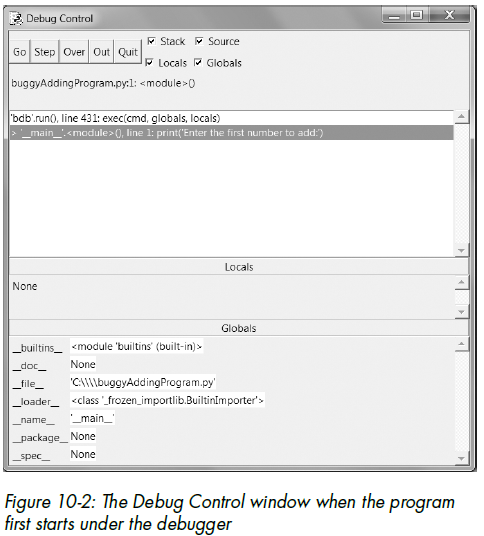

Now Click the **Over** button once to execute the first print() call. 

You should use Over instead of Step here, since you don’t want to step into the code for the print() function. 

The Debug Control window will update to line 2, and line 2 in the file editor window will be highlighted, as shown in Figure 10-3.

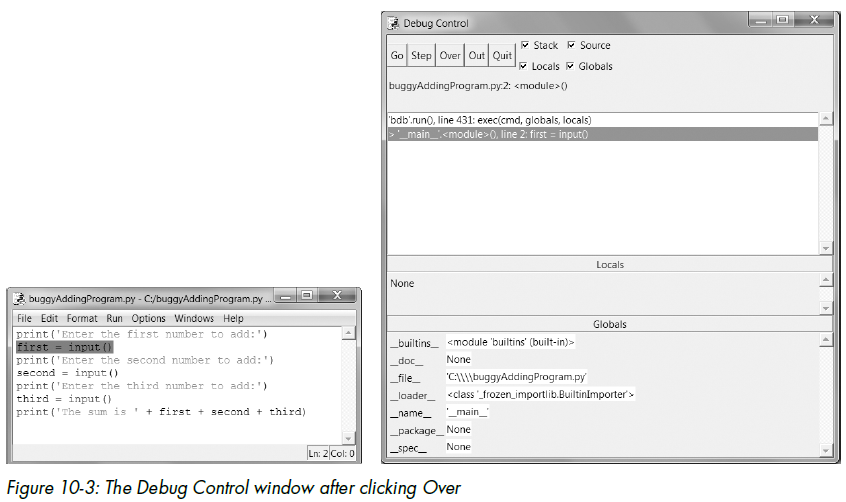

This shows the user, where the program execution currently is.

Click Over again to execute the input() function call, and the buttons in the Debug Control window will disable themselves while IDLE waits for the user to type something for the input() call into the interactive shell window.

Enter 5 and press Return. 

The Debug Control window buttons will be reenabled.

Keep clicking Over, entering 3 and 42 as the next two numbers, until the debugger is on line 7, the final print() call in the program. 

The Debug Control window should look like Figure 10-4. 

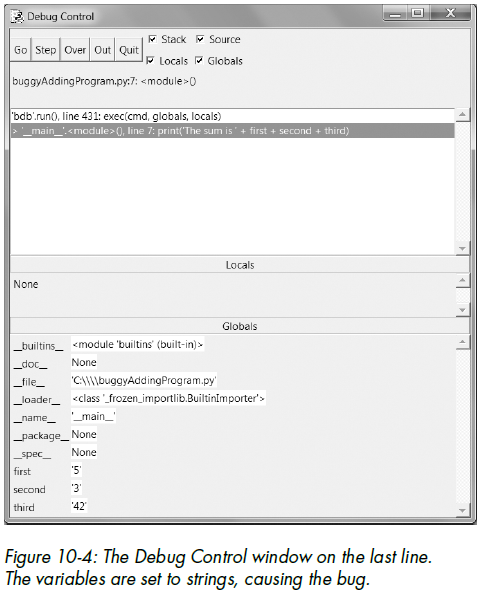

The user can see in the Globals section that the first, second, and third variables are set to string values '5', '3', and '42' instead of integer values 5, 3, and 42. 

When the last line is executed, these strings are concatenated instead of added together, causing the bug.

# **Breakpoints**
A breakpoint can be set on a specific line of code and forces the debugger to
pause whenever the program execution reaches that line. 

Open a new file editor window and enter the following program, which simulates flipping a coin 1,000 times. 

Save it as coinFlip.py.

In [ ]:
import random
heads = 0
for i in range(1, 1001):
  if random.randint(0, 1) == 1:       #1
    heads = heads + 1
  if i == 500:
    print('Halfway done!')              #2
print('Heads came up ' + str(heads) + ' times.')

**Explanation**: 

The random.randint(0, 1) call u will return 0 half of the time and 1 the other half of the time. 

This can be used to simulate a 50/50 coin flip where 1 represents heads. 

When you run this program without the debugger, it quickly outputs something like the following:

**Halfway done!**

**Heads came up 490 times.**

If user ran this program under the debugger, he would have to click the **Over** button thousands of times before the program terminated. 

If the user is interested in the value of heads at the halfway point of the program’s execution, when 500 of 1000 coin flips have been completed, he could
just set a breakpoint on the line print('Halfway done!') #2. 

To set a breakpoint, right-click the line in the file editor and select Set Breakpoint, as shown in Figure 10-5.

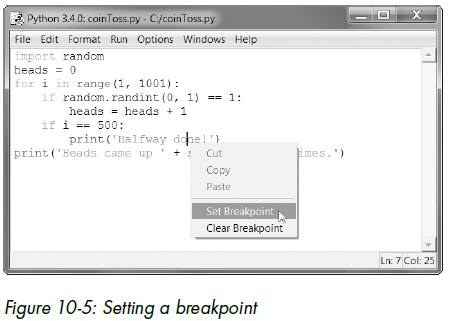

User doesn’t want to set a breakpoint on the if statement line, since the if
statement is executed on every single iteration through the loop. 

By setting the breakpoint on the code in the if statement, the debugger breaks only when the execution enters the if clause.

The line with the breakpoint will be highlighted in yellow in the file editor.

When user runs the program under the debugger, it will start in a paused state at the first line, as usual. 

But if user clicks Go, the program will run at full speed until it reaches the line with the breakpoint set on it. 

The user can then click Go, Over, Step, or Out to continue as normal.

If user wants to remove a breakpoint, right-click the line in the file editor
and select Clear Breakpoint from the menu. 

The yellow highlighting will go away, and the debugger will not break on that line in the future.

## **END OF MODULE - 3** 